# Ordinary Least Squares Regression

Noah Rubin

May 2021

In [1]:
# import pickle
# import joblib
# import random
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import xgboost as xgb
# import matplotlib.pyplot as plt
# from catboost import CatBoostRegressor

# from scipy import stats
# from itertools import combinations
# from IPython.display import display, Math

# import statsmodels.api as sm
# from statsmodels.stats import diagnostic as diag
# from statsmodels.stats.stattools import durbin_watson
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# from sklearn.impute import KNNImputer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.tree import DecisionTreeRegressor, plot_tree
# from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

# # Personal display settings
# #===========================

# # Suppress scientific notation
# np.set_printoptions(suppress=True)

# # Get dataset values showing only 2dp
# pd.options.display.float_format = '{:.2f}'.format
# pd.set_option('display.max_colwidth', None)

# # For HD plots with my favourite background
# plt.style.use('seaborn-whitegrid') 
# %config InlineBackend.figure_format = 'svg'

# # Updates when i change any of the relevant python files
# %load_ext autoreload
# %autoreload 2

### <u>Main Ideas</u>

- OLS tries to create a fit that minimises the sum of the squared residuals (sometimes called residual sum of squares, RSS)
- Residuals are the (red) vertical distances from the fit to our data points
- OLS with multiple independent variables is referred to as Multiple Regression
![mr_viz](OLS_image.png)

### <u>Algorithm Details</u>

In the population, the multiple regression model can be given as:

$$y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + ... + \beta_p x_{i,p} + \epsilon_i$$

* $y_i$ represents the $i^{\text{ih}}$ observation for our response variable
* $\beta_0$ is the true intercept in the population
* $\beta_1$ is the true coefficient for our first predictor
* $\beta_2$ is the true coefficient for our second predictor
* $\beta_p$ is the true coefficient for our pth predictor
* $x_1, x_2,..., x_p$ are predictor variables
* $\epsilon_i$ represent the unobservables/error term which is assumed to be distributed normally with:

$$E(\epsilon_i) = 0$$
$$Var(\epsilon_i) = \sigma^2 \text{(constant but unknown error variance)}$$ 

It turns out that when deriving OLS with multiple predictor variables, it is easier to see it work as a process of manipulating matrices. Applying the logic from above, it can be seen that

$$y_1 = \beta_0(1) + \beta_1 x_{1,1} + \beta_2 x_{1,2} + ... + \beta_p x_{1,p} + \epsilon_1$$
$$y_2 = \beta_0(1) + \beta_1 x_{2,1} + \beta_2 x_{2,2} + ... + \beta_p x_{2,p} + \epsilon_2$$
$$y_3 = \beta_0(1) + \beta_1 x_{3,1} + \beta_2 x_{3,2} + ... + \beta_p x_{3,p} + \epsilon_3$$
$$\vdots$$
$$y_n = \beta_0(1) + \beta_1 x_{n,1} + \beta_2 x_{n,2} + ... + \beta_p x_{n,p} + \epsilon_n$$


From this it can be seen that we can store our all of our $y_i$ values in an $(n \times 1)$ column vector and our of errors in a vector of the same size, such that:

$$\overrightarrow{y} = \begin{pmatrix}y_1\\y_2\\\vdots\\y_n\end{pmatrix} 
\text{, } 
\overrightarrow{\epsilon} = \begin{pmatrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\end{pmatrix}
$$

Each of the $\beta_j$'s never change across observations so we can store all of our population beta coefficients in a column vecor with dimension $((p+1) \times 1)$ as we have $p$ predictor variables as well as an intercept term. Hence, our coefficient vector of betas can be expressed as 

$$
\overrightarrow{\beta} = \begin{pmatrix}\beta_0\\\beta_1\\\beta_2\\\vdots\\\beta_p\end{pmatrix}
$$

Lastly if we look at each row we see that each beta is multiplied by an $x_{i,j}$ term, though $\beta_0$ is just multiplied by 1. So if we take all of our $x_{i, j}$'s out and place them in a [design matrix](http://gradientdescending.com/design-matrix-for-regression-explained/), we simply get all of our $p$ predictor variables as well as a column of ones (which caters for the existence of an intercept term). Hence our design matrix is of dimension $(n \times (p+1))$ and takes the form

$$X = \begin{pmatrix}
1 & x_{1,1} & x_{1,2} & ... & x_{1,p}\\
1 & x_{2,1} & x_{2,2} & ... & x_{2,p}\\
1 & x_{3,1} & x_{3,2} & ... & x_{3,p}\\
\vdots  & \vdots  & \vdots  & \ddots & \vdots\\
1 & x_{n,1} & x_{n,2} & ... & x_{n,p}\\
\end{pmatrix}.$$

If we multiply our design matrix and our vector of coefficients, and then add the vector of error terms, the following equation allows us to find each individual $y_i$ using matrix multiplication and vector addition

$$\begin{pmatrix}y_1\\y_2\\y_3\\\vdots\\y_n\end{pmatrix} = \begin{pmatrix}
1 & x_{1,1} & x_{1,2} & ... & x_{1,p}\\
1 & x_{2,1} & x_{2,2} & ... & x_{2,p}\\
1 & x_{3,1} & x_{3,2} & ... & x_{3,p}\\
\vdots  & \vdots  & \vdots  & \ddots & \vdots\\
1 & x_{n,1} & x_{n,2} & ... & x_{n,p}\\
\end{pmatrix} \begin{pmatrix}{\beta_0}\\\beta_1\\{\beta_2}\\\vdots\\{\beta_p}\end{pmatrix} + \begin{pmatrix}\epsilon_1\\\epsilon_2\\\epsilon_3\\\vdots\\\epsilon_n\end{pmatrix}$$

In short,

$$\vec{y} = X\vec{\beta} + \vec{\epsilon}.$$

































As we wish to minimise the sum of squared deviations between the actual value of $y$ and its expectated value $X\vec{\beta}$ (assuming errors are noramlly distribited with mean zero and unknown but constant variance),
we can minimise the quantity 

$$\sum_{i=1}^n (y_i - (X\vec{\beta})_i)^2 = \vec{\epsilon}^T \vec{\epsilon} = \epsilon_1^2 + \epsilon_2^2 + ... + \epsilon_n^2$$

Also expressable as 

$$J(\vec{\beta}) = (\vec{y} - X\beta)^T(\vec{y} - X\beta)$$ 

Expanding the brackets,

$$J(\vec{\beta}) = \vec{y}^T\vec{y} -2\vec{b}^TX^T \vec{y} + \vec{\beta}^TX^TX\vec{\beta}$$

Now, as we wish to minimise this cost function $J(\vec{\beta})$ we can take the partial derivative with respect to $\vec{\beta}$ and set this to zero. It always ends up being a minimum as $J(\vec{\beta})$ is known to be a [convex function](https://en.wikipedia.org/wiki/Convex_function) with a positive definite Hessian matrix when considering second derivatives

Thus, taking the partial derivative with respect to beta (using matrix calculus) we obtain, 

$$\frac{\partial J(\vec{\beta})}{\partial \vec{\beta}} = -2X{^T}\vec{y} + 2X^TX\vec{\beta}$$ 

Setting this quantity to 0 for a mininum, we can obtain an estimnator $\vec{b}$ for $\vec{\beta}$

$$-2X{^T}\vec{y} + 2X^TX\vec{b} = 0$$

Dividing by two and rearranging,

$$X^TX\vec{b} = X{^T}\vec{y}.$$

"Pre-multiplying" both sides by $(X^TX)^{-1}$ we minimise the sum of squared residuals through 

$$\vec{b} = (X^TX)^{-1}X{^T}\vec{y}$$

...assuming the model is a full rank linear model where $(X^TX)$ is non-singular


#### <ins>Expectation & Variance</ins>

Assuming a full rank linear model, the OLS estimator $\vec{b}$ is unbiased since:
$$E(\vec{b}) = E((X^TX)^{-1}X^{T}\vec{y}) = (X^TX)^{-1}X^{T}E(\vec{y})$$

Since $E(\vec{y}) = E(X\vec{\beta} + \vec{\epsilon}) = X\vec{\beta}$ it follows that:

$$E(\vec{b}) = (X^TX)^{-1}X^{T}X\vec{\beta} = \vec{\beta}$$

---

Similarly the variance of our $\vec{b}$ estimator is given as:

$$\text{Var}(\vec{b}) = \text{Var}((X^TX)^{-1}X^{T}\vec{y})$$

As $(X^TX)^{-1}X^{T}$ is a $(p+1) \times n$ matrix of real numbers and $\vec{y}$ is an $n \times 1$ column-vector-valued random variable, it follows that

$$\text{Var}(\vec{b}) = (X^TX)^{-1}X^T\text{Var}\vec{(y)}((X^TX)^{-1}X^T)^T$$

Using matrix transpose laws, and the fact that $\text{Var}\vec{(y)} = \text{Var}(X\vec{\beta} + \vec{\epsilon}) = \sigma^2I$ (where $I$ is an $n \times n$ identity matrix)

$$\text{Var}(\vec{b}) = (X^TX)^{-1}X^T\sigma^2IX((X^TX)^T)^{-1}$$

Assuming constant error variance, 

$$\text{Var}(\vec{b}) = \sigma^2I(X^TX)^{-1}X^TX((X^TX)^T)^{-1}$$

Cancelling terms $(X^TX)^{-1}$ and $X^TX$, it follows that 

$$\text{Var}(\vec{b}) = \sigma^2((X^TX)^T)^{-1}$$

Since $X^TX$ is symmetric,

$$\text{Var}(\vec{b}) = \sigma^2(X^TX)^{-1}$$



#### <ins>The Gauss Markov Theorem</ins>

The Gauss Markov Theorem implies that the OLS estimator has the lowest sampling variance out of all linear unbiased estimators if Gauss Markov Assumptions are adhered to. Since we are dealing with unbiased estimators, the fact that OLS has the lowest sampling variance implies it has the lowest mean squared error.

Consider $\vec{b^*}$, an arbitrary linear unbiased estimator of $\beta$ where $\vec{b^*} = (X^TX)^{-1}X^T + M)\vec{y}$, where $M$ is a $((p+1) \times n)$ non-zero matrtix

Taking the expectation of $\vec{b^*}$, we obtain 

$$E(\vec{b^*}) = E((X^TX)^{-1}X^T + M)\vec{y})$$

Substituting $\vec{y} = X\vec{\beta} + \vec{\epsilon}$

$$E(\vec{b^*}) = E((X^TX)^{-1}X^T + M)(X\vec{\beta} + \vec{\epsilon}))$$

Expanding the brackets, and through linearity of the expectation operator

$$E(\vec{b^*}) = E([(X^TX)^{-1}X^T + M)]X\vec{\beta}) + [(X^TX)^{-1}X^T + M)]E(\vec{\epsilon})$$

Since we assume $E(\epsilon_i) = 0$

$$E(\vec{b^*}) = E([(X^TX)^{-1}X^T + M)]X\vec{\beta})$$

Expanding the brackets, and the fact that $X$ is not considered random,

$$E(\vec{b^*}) = (X^TX)^{-1}X^TX\vec{\beta} + MX\vec{\beta}$$

Due to cancellation in the first term

$$E(\vec{b^*}) = \vec{\beta} + MX\vec{\beta} = (I + MX)\vec{\beta}$$

implying that this estimator can only be unbiased if $MX = 0.$

---

If we consider the variance of this arbitrary estimator


\begin{align} 
\text{Var}(\vec{b^*}) &= \text{Var}((X^TX)^{-1}X^T + M)\vec{y}) \\
&= ((X^TX)^{-1}X^T + M)\text{Var}(\vec{y})((X^TX)^{-1}X^T + M)^T \tag{since $((X^TX)^{-1}X^T + M)$ is not random}\\ 
&= \sigma^2((X^TX)^{-1}X^T + M)((X^TX)^{-1}X^T + M)^T \tag{assuming constant, unknown error variance}\\ 
&= \sigma^2[((X^TX)^{-1}X^T + M)(X(X^TX)^{-1} + M^T)] \\ 
&= \sigma^2[  (X^TX)^{-1}X^TX(X^TX)^{-1} + (X^TX)^{-1}X^TM^T + MX(X^TX)^{-1} + MM^T] \\ 
&= \sigma^2(X^TX)^{-1} + \sigma^2(X^TX)^{-1}X^TM^T + \sigma^2MX(X^TX)^{-1} + \sigma^2MM^T \\
&= \text{Var}(\vec{\beta}) + \sigma^2(X^TX)^{-1}(MX)^T + \sigma^2MX(X^TX)^{-1} + \sigma^2MM^T \tag{since $\text{Var}(\vec{\beta}) = \sigma^2(X^TX)^{-1}$}\\
&= \text{Var}(\vec{\beta}) + \sigma^2MM^T \tag{as $MX=0$ for unbiased estimate} \\
&\geq \text{Var}(\vec{\beta}) \tag{since $MM^T$ is positive semi-definite}
\end{align} 

Hence, as $MM^T$ is positive semi definite, then by the Gauss Markov theorem, $\text{Var}(\vec{b}) \leq \text{Var}(\vec{b^*})$





























In [2]:
import ols_functions
import data_prep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Personal display settings
#===========================

# Suppress scientific notation
np.set_printoptions(suppress=True)

# Get dataset values showing only 2dp
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)

# For clear plots with a nice background
plt.style.use('seaborn-whitegrid') 
%config InlineBackend.figure_format = 'svg'

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('../datasets/train_updated.csv')
test = pd.read_csv('../datasets/test_updated.csv')

In [4]:
# Split data
to_drop = ['Country', 'HDI', 'Life_exp']

X_train = train.drop(to_drop, axis='columns')
X_test = test.drop(to_drop, axis='columns')

y_train = train['Life_exp']
y_test = test['Life_exp']

Plan:

* Log the GDP Variable
* Apply one hot encoding to the 'Status' feature
* Perform [KNN imputation](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)
* Once the previous steps have been implemented, run OLS regression on the training data and through cross validation eventually see which value of K was optimal

In [5]:
# This function included in all the steps
pipe = data_prep.create_pipeline(LinearRegression())
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('logger',
                                                                   FunctionTransformer(func=<ufunc 'log'>))]),
                                                  ['GDP_cap']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Status'])])),
                ('imputation', KNNImputer()), ('model', LinearRegression())])

**Hyperparamter Tuning**

While linear regression does not have any hyperparameters to tune, the KNN imputation beforehand was governed by a value of $k$, which through our pipeline and grid search, we can find what value of $k$, when followed by a linear regression minimised mean squared error

In [6]:
param_grid = {'imputation__n_neighbors':np.arange(3, 21, 2), 'imputation__weights':['uniform', 'distance']}

best_estimator, best_params = data_prep.exhaustive_search(X_train, y_train, pipe, param_grid, cv=10, scoring='neg_mean_squared_error')
final_model = best_estimator.fit(X_train, y_train)
print(best_params)

# print(final_model.named_steps['model'].intercept_)
# print(final_model.named_steps['model'].coef_)

{'imputation__n_neighbors': 3, 'imputation__weights': 'uniform'}


### <span style="color:black"><u>Model Evaluation</u></span>
* Statsmodels is useful for model evaluation and hypothesis testing, though it does not support preprocessing and model building pipelines the way sklearn does
* Will therefore perform the previous steps from scratch so that we can evaluate the model in statsmodels 

In [7]:
# Manually applies all the steps specified in the pipeline
X_train_statsmodels, X_test_statsmodels = ols_functions.apply_preprocessing_steps(X_train, X_test)

In [8]:
# Summary table for our model
model = sm.OLS(y_train, X_train_statsmodels).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life_exp   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3069.
Date:                Sat, 25 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:46:39   Log-Likelihood:                -4754.6
No. Observations:                2056   AIC:                             9527.
Df Residuals:                    2047   BIC:                             9578.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -17.0359     21.452     -0.794      0.427     -59.105      25.033
Year                  0.0404      0.011      3.753      0.000       0.019       0.062
InfantMortality      -0.2106      0.005    -45.826      0.000      -0.220      -0.202
Health_exp            0.2969      0.024     12.134      0.000       0.249       0.345
Employment            0.0274      0.006      4.601      0.000       0.016       0.039
Status               -1.7930      0.210     -8.545      0.000      -2.204      -1.382
MeanSchooling        -0.4358      0.034    -12.825      0.000      -0.502      -0.369
ElectricityAccess     0.0849      0.005     18.368      0.000       0.076       0.094
ln(GDP_cap)           0.8012      0.074     10.805      0.000       0.656       0.947
==============================================================================
Omnibus:                       33.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.062
Skew:                          -0.110   Prob(JB):                     2.47e-13
Kurtosis:                       3.793   Cond. No.                     7.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <span style="color:black"><u>Heteroskedasticity</u></span>

* Homoskedasticity in regression analysis is the idea that the variance of the unobserved factors $\epsilon$ should not change across different segments of the population
* Hence $\text{Var}(\epsilon|x_1, x_2, ... x_p) = \sigma^2$ (constant error variance) must be adhered to to ensure homoskedasticity
* OLS coefficients can still remain unbiased in the presence of heteroskedasticity, and we can still interpret $R^2$ and adjusted $R^2$ to assess goodness-of-fit. Though the problem is that with heteroskedasticity our $F$ statistic (in the above table) is no longer F-distributed and the various $t$ statistics are not t-distributed. Hypothesis testing on our $\hat{\beta}_j$ coefficients can't be done as our p-values will be distorted due to incorrect standard errors
* This means that most of the output in the table above can't be interpreted, and hence we are less sure of the effects of certain variables

<u>Detecting Heteroscedasticity</u>

* To detect heteroskedasticity, we can use tools such as the [Breusch-Pagan Test](https://www.real-statistics.com/multiple-regression/heteroskedasticity/breusch-pagan-test/), or we can simply graph a residual plot. 
* There are also other methods such as using [White's Test](https://www.youtube.com/watch?v=M5xqpKzhyAM), which is similar to the Breusch Pagan test, but considers squared terms and well as cross products of independent variable combinations.

---

**The Breusch-Pagan Test**

We define a null and alternate hypothesis

$$H_0: \text{Var}(\epsilon|x_1, x_2, ... x_p) = \sigma^2 (\text{ homoskedastic errors})$$

$$H_1: \text{Var}(\epsilon|x_1, x_2, ... x_p) \neq \sigma^2 (\text{ heteroskedastic errors})$$

It is also possible to define the null hypothesis as $E(\epsilon^2|x_1, x_2, ... x_p) = \sigma^2$ since  $\text{Var}(\epsilon|x_1, x_2, ... x_p) = E(\epsilon^2|x_1, x_2, ... x_p) - [E(\epsilon|x_1, x_2, ... x_p)]^2$. Due to the zero conditional mean assumption (no correlation between any of the regressors and the error term) that $E(\epsilon|x_1, x_2, ... x_p) = 0$, this second term disappears, and we can therefore test whether $\epsilon^2$ is related (in expected value) to one or more of the regressors in our model

---

1. First, we run a regression just like before, with our dependent variable $y$ and all of our predictor $x$ variables
2. As the regression estimate will likely never be a perfect fit for the data, there will be residuals present
3. Store the squared residuals and then let it be the dependent variable for a new regression model, taking the form:

$$\hat{u}^2 = \hat\delta_0 + \hat\delta_1x_1 + \hat\delta_2x_2 + \hat\delta_3x_3 + ... \hat\delta_px_p$$

where $\hat{u}^2$ represents the fitted values for the squared residuals which became our new dependent variable, the $\hat\delta$'s represents the parameters that minimise RSS for this new model, and the $x$ variables represents InfantMortality. MeanSchooling etc.

4. We then calculate the $R^2$ coefficient of determination for this model and use this to calculate a test statistic known as the <ins>Lagrange Multiplier</ins>. This is given as:

$$\text{LM}=nR^{2}$$

where $n$ refers to the number of observations in our training set. Under the null hypothesis, this is distributed as a [Chi-squared](https://www.sciencedirect.com/topics/mathematics/chi-square-distribution) random variable with $p$ degrees of freedom, where $p$ is the number of covariates ($x$ variables) in our current model. Depending on the significance level and $p$-values we either reject or fail to reject the null hypothesis.

Performing Breusch Pagan Test...

Lagrange Multiplier = 314.78029411402736, p-value = 2.9336818369803655e-63

Heteroskedasticity is present in this model (at the 5% significance level)


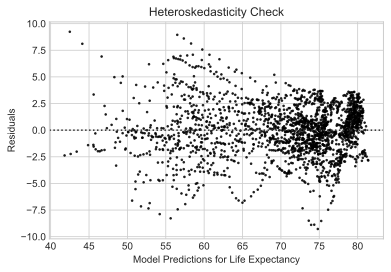

In [9]:
ols_functions.test_heteroskedasticity(model)

Add Taylor Series stuff on heteroskedasticity here 
- 

### <span style="color:black"><u>Multicollinearity</u></span>

* It is nice to have features strongly correlated with life expectancy, but what if our predictor variables are correlated with each other?
* "In statistics, multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy." ~ Wikipedia

--- 

**Why it can be problematic?**

* Essentially if multicollinearity exists, it becomes very difficult to discern which variable is playing a larger role in our regression model as the two (or more) variables themselves are so similar.
* The idea in regression is that our coefficients represent the change in $y$ when there is a one unit increase in a predictor variable $x$, Ceteris Paribus
* But in cases where multicolinearity exists, often it is not possible to hold other predictor variables constant when one increases 

---

**Mathematically...**

- A model with significant multicolinearity will inflate the standard errors of the beta coefficients impacted by multicollinearity
- As well as standard errors increasing in the prescence of multicollinearity, multicollinearity also makes our coefficients very sensitive to large swings. For example, taking a variable out or adding one in might cause large changes in our current coefficients. Hence we become less certain about what our coefficients might be in the population
- Large standard errors will also distort your p-values as the standard error is used to calculate the t-statistic, which is then used to calculate the p-value. We might then conclude that a variable is insignificant and has no impact on $y$ when in fact it might
- Though even when multicollinearity is present, the least-squares estimator can still be unbiased and efficient.
- Though in cases where there is [perfect multicollinearity](https://www.dummies.com/education/economics/econometrics/perfect-multicollinearity-and-your-econometric-model/), the matrix $X^TX$ becomes singular, which means that OLS will not have a unique solution

---

**How can we check for multicollinearity?**

1. Using a correlation heatmap
    
* This would involve looking at our correlation heatmap from before and seeing which **predictor** variables have correlation with one another close to -1 and 1.
* This is nice for eyeballing 'red flags' but Variance Inflation Factor is a better option

2. Using [Variance Inflation Factors (VIF)](https://en.wikipedia.org/wiki/Variance_inflation_factor)

The variance of the estimated coefficient for the jth predictor in our regression model is given as:

$$\text{Var}(\hat{\beta}_j) = \frac{\sigma^2}{\sum_{i=1}^{n} {(x_{ij} - \bar{x}_j)^2}} \times \text{VIF}_j$$

Hence VIF is the factor by which $\text{Var}(\hat{\beta}_j)$ increases due there being correlation between the $j^{th}$ predictor and other $x$ variables

* VIF for each predictor variable is calculated using something known as **tolerance**. 

$$\text{tolerance} = 1 - R^2$$

* The VIF is then computed as:

$$\text{VIF} = \frac{1}{\text{tolerance}}$$

---

When calculating VIF for each predictor variable, we build auxilliary regression models. With an auxiliary regression model, we set one of our $x$ variables to be the response. There is no $y$ here as we are just trying to detect multicollinearity among our regressors

$$\hat{x}_1 = \hat\delta_0 + \hat\delta_1x_2 + \hat\delta_2x_3  + \hat\delta_3x_4 +...+ \hat\delta_px_p$$

In similar fashion to this if we wanted to calculate the VIF for $x_2$ we would build an auxilliary regression of the form

$$\hat{x}_2 = \hat\gamma_0 + \hat\gamma_1x_1 + \hat\gamma_2x_3  + \hat\gamma_3x_4 +...+ \hat\gamma_px_p$$

Now, because we don't want a model where one $x$ variable can be linearly predicted from other $x$ variables, we want $R^2$ to be rather low. A high $R^2$ (i.e. one very close to 1) will mean that **tolerance** gets closer to 0 (refer to the tolerance formula), which would then mean that our VIF becomes very large, such that:

\\[\frac{\text{1}}{\text{a small tolerance number close to 0}} = \text{a very large number} \\]

Typically if our VIF for a particular variable is over 5 (some argue 10), then the prescence of the variable is causing multicolinearity. Statsmodels suggests in its documentation to go for 5 as the max.

In [10]:
# Use Display VIF function

### <span style="color:black"><u>Distribution of the Error Term</u></span>

Ideally, we would like the population error $\epsilon$ to be independent of our regressors and distributed normally (with zero mean and constant error variance). While we don't have the population errors, we can use our sample residuals to make inferences about the population. Though in our case the fact that there was heteroskedasticity implies that there is non-constant error variance present. Nevertheless, it can still be useful to test for normality

Some ways of testing for normality include

- Plot a density curve
- Measure skewness
- QQ-plot
- Kolmogorov-Smirnov test 
- Jarque-Bera test
- Shapiro-Wilk test
- Anderson-Darling test
- D'Agostino-Pearson test

<u>Kolmogorov-Smirnov Test (KS Test)</u>
* The KS Test is a non-parametric statistical test, so it does assume anything about the distribution of the data
* The KS Test relies on what it known as a [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF). 


<u>How does the concept of a CDF relate to the KS Test?</u>

* The purpose of the KS Test is to test for differences in the overall shape of two distributions
* The two distributions in our case refer to a the CDF of a standard normal distribution and what we call an Empirical CDF (ECDF)
* An ECDF represents a CDF but for empirical data (observed data), which in turn gives us the probability of observing an $x$ value less than or equal to the one in question
* Though because we are comparing our observed data (the model residuals) against a standard normal distribution, we need to standardise our values as well
* The data needs to be continous in order to do this test.

<u>Hypothesis Testing</u>

1. Null and alternate hypothesis 

* $H_0$: The two samples have been drawn from the same population distribution
* $H_1$: The two samples have NOT been drawn from the same population distribution

2. Determine a level of significance $\alpha$

* I'll do the statistical test at a 95% confidence level, hence $\alpha = 0.05$

3. Calculate the test statistic 'D' and the corresponding p-value.

* In this case, our test statistic 'D' simply refers to the absolute value of the largest vertical distance from our ECDF to the CDF of the standard normal distribution (generic example graphed below). The p-value is then interpreted as the following: 

* If the samples have been drawn from the same population distribution (i.e. if the null hypothesis is true), what is the probability of obtaining a D statistic value at least as extreme as the one that was calculated
* We calculate our p-value based off the Kolmogorov distribution and if our p-value is less than 0.05, there is enough evidence to reject the null hypothesis
---

This graph shows a CDF (red) vs an ECDF (blue), with the D statistic being the maximum vertical distance shown (the black arrow)


![Random Unsplash Image](https://upload.wikimedia.org/wikipedia/commons/c/cf/KS_Example.png)

D: 0.19236628913486353

p-value: 4.1086043031909534e-67


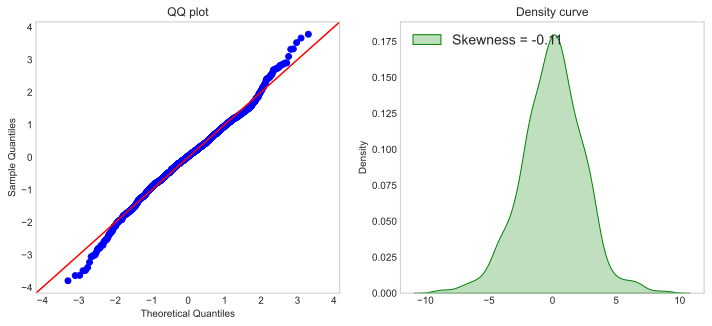

In [12]:
# Call the function
ols_functions.check_residual_normality(model, residual_data = model.resid);

---

<ins>**Implementation (using real data now)**</ins>

In [ ]:
train.columns

In [ ]:
# Training and testing sets
X_train = train.drop(['Country', 'GDP_cap', 'Life_exp'], axis='columns')
X_test = test.drop(['Country', 'GDP_cap', 'Life_exp'], axis='columns')

y_train = train['Life_exp']
y_test = test['Life_exp']

In [ ]:
# Impute missing data using KNNImputer
# Will be applying cross validation to this process for some of the other fancier models

imp = KNNImputer(n_neighbors=5)
X_train_new = pd.DataFrame(imp.fit_transform(X_train), columns=X_train.columns)
X_test_new = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)

In [ ]:
# Build linear model with all these variables included (apart from the ones dropped)
X_train_new1 = sm.add_constant(X_train_new)

# Fit the model
linear_regression = sm.OLS(endog=y_train, exog=X_train_new1).fit()

# Our b vector is the column under coef
linear_regression.summary().tables[1] 

### <span style="color:black">**Model Diagnostics and Gauss Markov Assumptions**</span>.

* Is this linear model our Best Linear <b>Unbiased</b> Estimator (BLUE)? 
* It is common to look into Gauss Markov regression assumptions when assessing this

1. The model is linear in the parameters
2. A random sample has been drawn from the population
3. There is no perfect collinearity (there are no situations where one variable is an exact linear combination of others) ✅
4. The error term is not correlated with any of the regressors, hence $E(\epsilon_i | x_1, x_2, ..., x_p) = 0$ (Zero Conditional Mean)

If these assumptions are met, each $\hat{\beta}_j$ coefficient is unbiased, hence:

$$E(\hat{\beta}_j) = \beta_j$$ 

So we expect the estimator to be equal to the true value of the population parameter as we take an increasing number of samples

There is another Gauss Markov assumption, [Homoscedasticity](https://statisticsbyjim.com/regression/heteroscedasticity-regression/) which is required in order for the 'Best' part of '<b>Best</b> Linear Unbiased Estimator' to be true. Not having homoskedasticity (i.e having heteroskedasticity) does not cause OLS estimators to be biased, but it is no longer BLUE